# Project Goal: Stock Market Prediction

In [2]:
import warnings 
warnings.filterwarnings("ignore")

# 1. Import Necessary Libraries

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

# 2. Importing Data

In [4]:
df = pd.read_csv('TataDateClose.csv')
df

,Date,Close
0,2016-01-01,401.90
1,2016-01-04,377.05
2,2016-01-05,374.45
3,2016-01-06,365.90
4,2016-01-07,343.55
...,...,...
1481,2021-12-27,471.15
1482,2021-12-28,480.20
1483,2021-12-29,476.00
1484,2021-12-30,470.40


# Exploratory Data Analysis(EDA)

# 3. Data Understanding

In [5]:
df.shape # Rows & columns

(1486, 2)

In [6]:
df.info

<bound method DataFrame.info of             Date   Close
0     2016-01-01  401.90
1     2016-01-04  377.05
2     2016-01-05  374.45
3     2016-01-06  365.90
4     2016-01-07  343.55
...          ...     ...
1481  2021-12-27  471.15
1482  2021-12-28  480.20
1483  2021-12-29  476.00
1484  2021-12-30  470.40
1485  2021-12-31  482.40

[1486 rows x 2 columns]>

In [7]:
df.dtypes # Looking for data types

Date      object
Close    float64
dtype: object

### Date is objective type data

In [8]:
df.isna().sum() # Looking for NAN values

Date     0
Close    0
dtype: int64

### There is no null values in the data set

In [9]:
df.describe()

,Close
count,1486.000000
mean,302.155686
std,137.860571
min,65.300000
25%,173.525000
50%,307.700000
75%,428.162500
max,588.700000


In [10]:
df.describe(include='all')

,Date,Close
count,1486,1486.000000
unique,1486,NaN
top,2016-01-01,NaN
freq,1,NaN
mean,NaN,302.155686
std,NaN,137.860571
min,NaN,65.300000
25%,NaN,173.525000
50%,NaN,307.700000
75%,NaN,428.162500


In [11]:
df.head()

,Date,Close
0,2016-01-01,401.90
1,2016-01-04,377.05
2,2016-01-05,374.45
3,2016-01-06,365.90
4,2016-01-07,343.55


In [12]:
df.tail()

,Date,Close
1481,2021-12-27,471.15
1482,2021-12-28,480.20
1483,2021-12-29,476.00
1484,2021-12-30,470.40
1485,2021-12-31,482.40


In [13]:
df['Date'].nunique() # Looking for unique values

1486

In [14]:
df['Close'].nunique() # Looking for unique values

1350

In [15]:
df.value_counts()

Date        Close 
2016-01-01  401.90    1
2020-01-02  193.75    1
2020-01-15  200.35    1
2020-01-14  195.85    1
2020-01-13  196.25    1
                     ..
2017-12-28  418.60    1
2017-12-27  422.45    1
2017-12-26  424.20    1
2017-12-22  422.00    1
2021-12-31  482.40    1
Length: 1486, dtype: int64

In [16]:
df

,Date,Close
0,2016-01-01,401.90
1,2016-01-04,377.05
2,2016-01-05,374.45
3,2016-01-06,365.90
4,2016-01-07,343.55
...,...,...
1481,2021-12-27,471.15
1482,2021-12-28,480.20
1483,2021-12-29,476.00
1484,2021-12-30,470.40


# 4. Data Preparation

#### 1.Since date columnn is objective type data need to change it to type date time

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Close
0,2016-01-01,401.90
1,2016-01-04,377.05
2,2016-01-05,374.45
3,2016-01-06,365.90
4,2016-01-07,343.55
...,...,...
1481,2021-12-27,471.15
1482,2021-12-28,480.20
1483,2021-12-29,476.00
1484,2021-12-30,470.40


In [18]:
df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1486 non-null   datetime64[ns]
 1   Close   1486 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.3 KB


#### 2. Chaining  index to the data in order to make it proper time series data

In [20]:
df_New = pd.read_csv('TataDateClose.csv', header=0, index_col=0,squeeze=True,parse_dates=True)
df_New 

Date
2016-01-01    401.90
2016-01-04    377.05
2016-01-05    374.45
2016-01-06    365.90
2016-01-07    343.55
               ...  
2021-12-27    471.15
2021-12-28    480.20
2021-12-29    476.00
2021-12-30    470.40
2021-12-31    482.40
Name: Close, Length: 1486, dtype: float64

In [21]:
df_New.shape

(1486,)

#### 3. Cleaning and Handling the missing values & Outliers

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1486 non-null   datetime64[ns]
 1   Close   1486 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.3 KB


#### Insight: No missing values present in the dataset

#### 4. Box plot for checking outliers present in my dataset

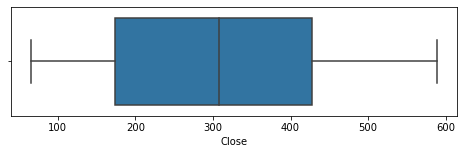

In [23]:
plt.figure(figsize=(8,2))
ax = sns.boxplot(x = df['Close'], whis=1.5)

#### Insight: There are no outliers present in my dataset

# Visualization of data distribution

#### 1. Histogram

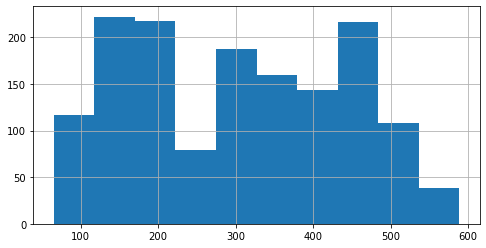

In [24]:
plt.figure(figsize=(8,4))
df_New.hist()
plt.show()

#### 2. Plot

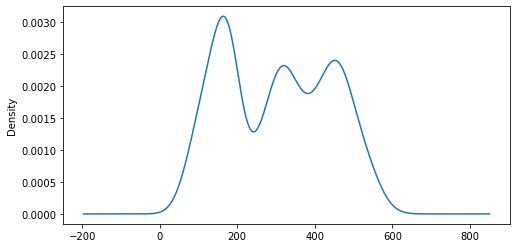

In [25]:
plt.figure(figsize=(8,4))
df_New.plot(kind='kde')
plt.show()

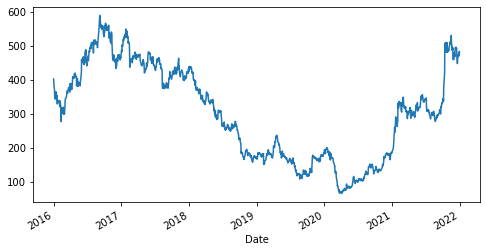

In [26]:
plt.figure(figsize=(8,4))
df_New.plot()
plt.show()

#### Insight: Trend is upword or positive

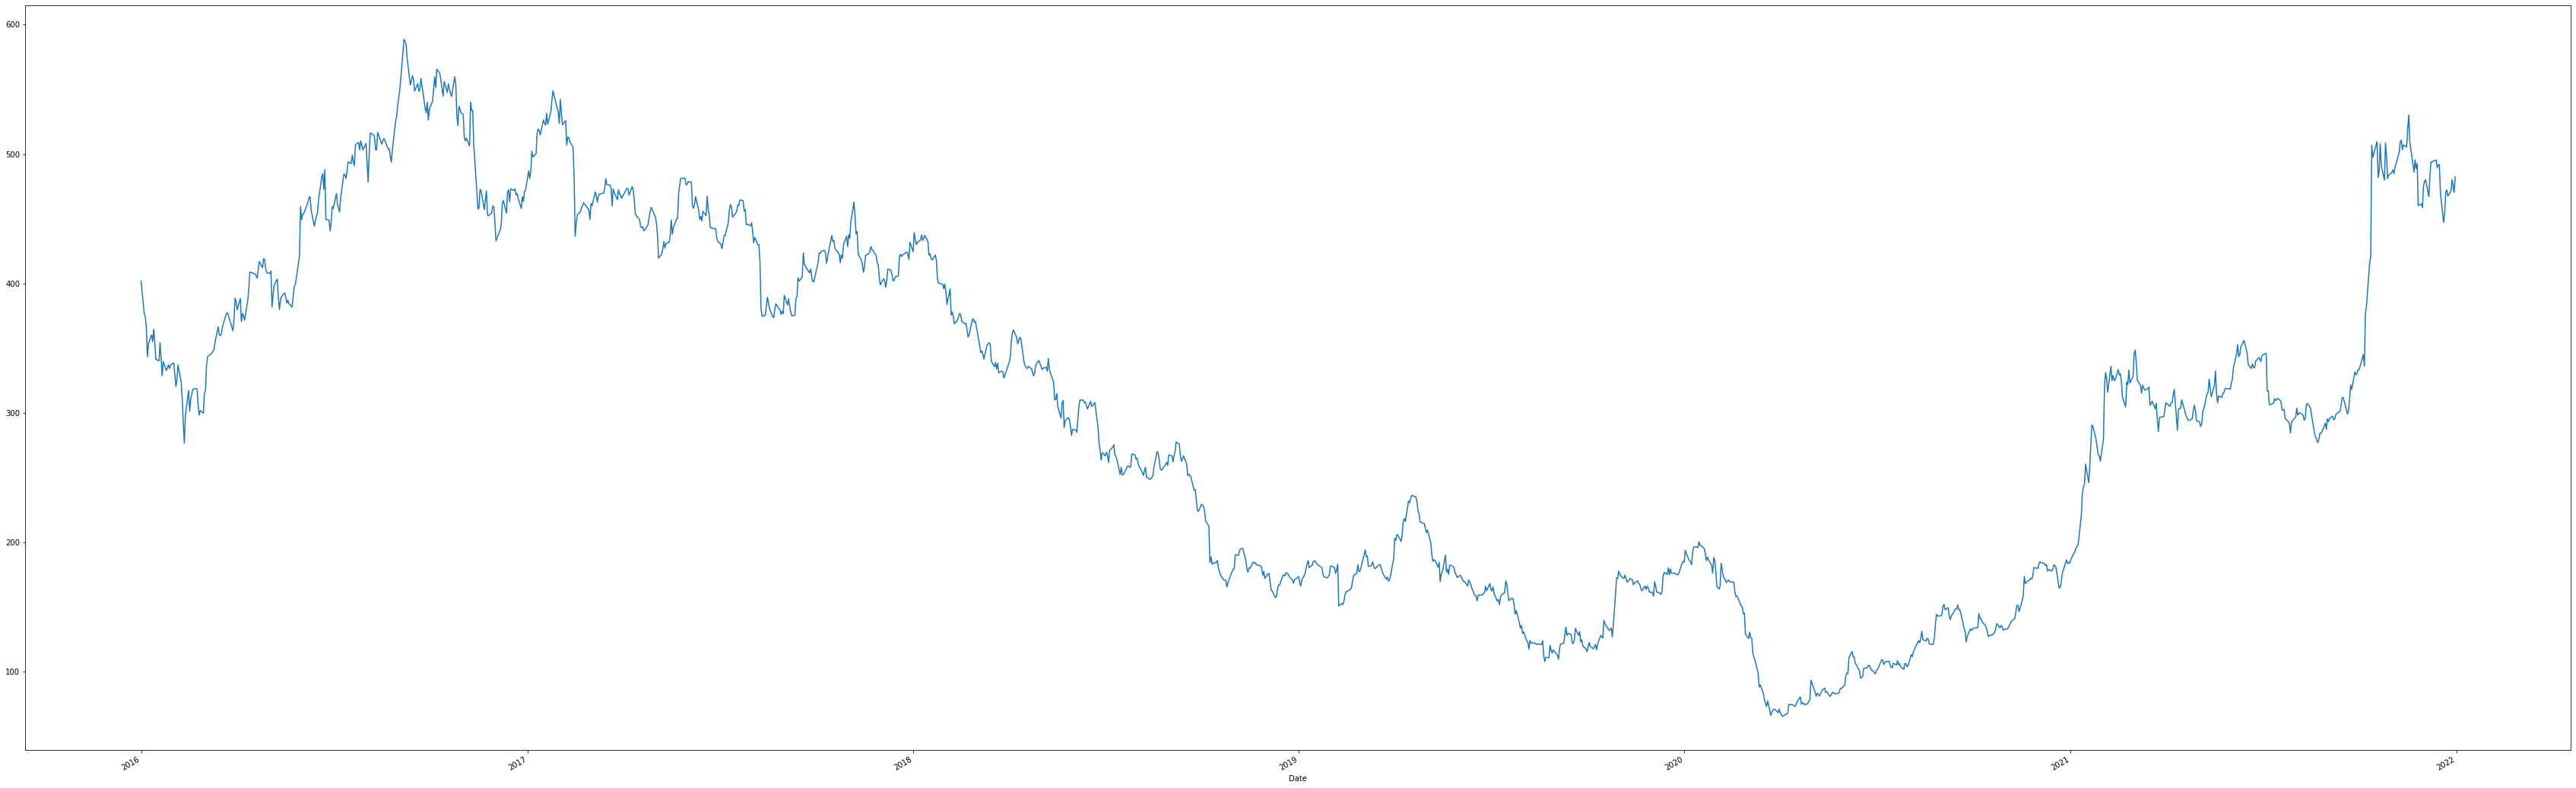

In [27]:
plt.figure(figsize=(60,20))
df_New.plot()
plt.show()

#### Insight: Seasonality can be observed little bit

In [28]:
import warnings
warnings.filterwarnings('ignore')

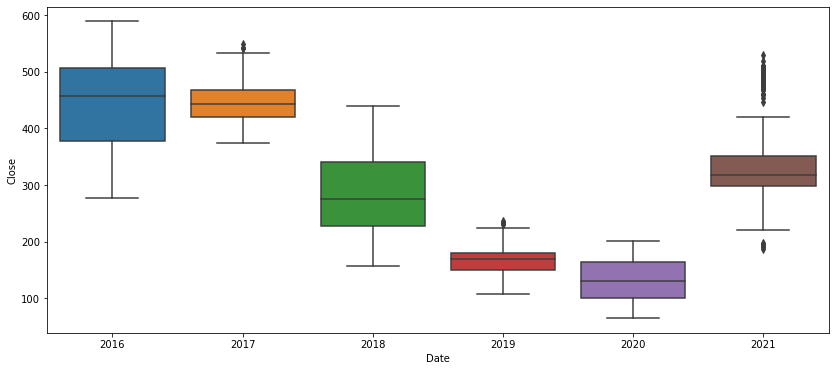

In [29]:
fig, ax = plt.subplots(figsize=(14,6))
sns.boxplot(df_New.index.year, df_New, ax=ax)
plt.show()

#### Insight: The growth in the price has much more of an exponential growth

# Correlation between variables & Visualizing in heat map

#### - Since our data is univarient we cannot compare between two variables,  So we need to look into the Lag plot which is nothing but the plotting of value against its lagged value

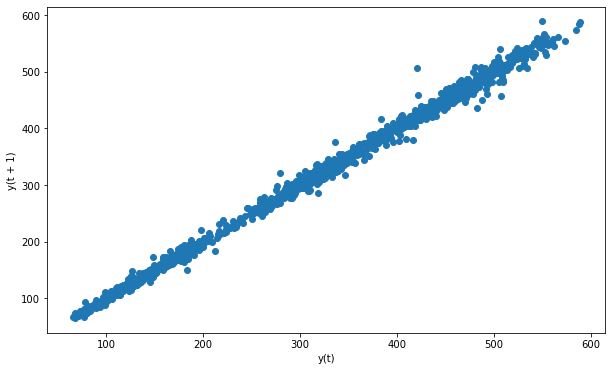

In [30]:
plt.figure(figsize=(10,6))
lag_plot(df_New, lag=1)
plt.show()

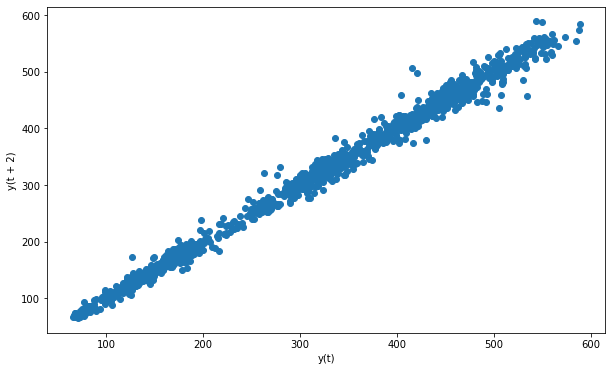

In [31]:
plt.figure(figsize=(10,6))
lag_plot(df_New, lag=2)
plt.show()

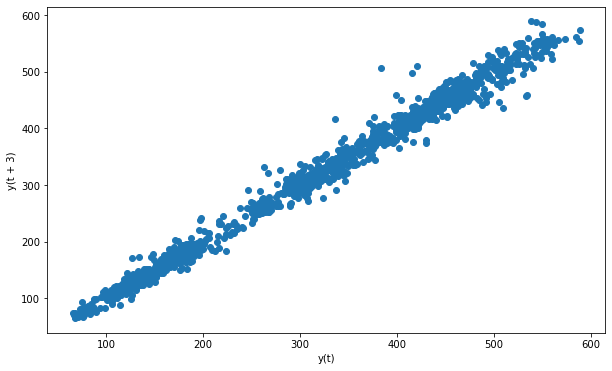

In [32]:
plt.figure(figsize=(10,6))
lag_plot(df_New, lag=3)
plt.show()

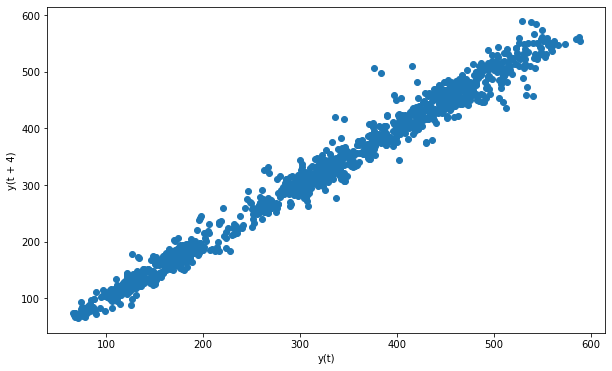

In [33]:
plt.figure(figsize=(10,6))
lag_plot(df_New, lag=4)
plt.show()

#### Insight: From lag_1,2,3 & 4 suggest the positive correlation

### Creating autocorrelation plot

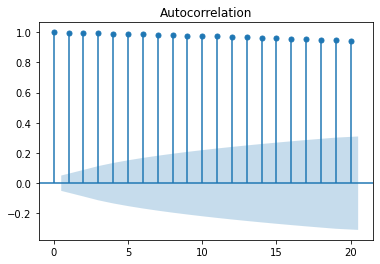

In [34]:
plot_acf(df_New, lags=20)
plt.show()

#### Insight : Autocorrelation plot suggest that immediate lags have significate relationship to build a good forecating model

#### To seee the heat map we need to process the data a little bit

In [35]:
df['Close']=round(df['Close'])
df['Year']=df['Date'].dt.year
df['Month_of_Year']=df['Date'].dt.month

In [36]:
df

,Date,Close,Year,Month_of_Year
0,2016-01-01,402.0,2016,1
1,2016-01-04,377.0,2016,1
2,2016-01-05,374.0,2016,1
3,2016-01-06,366.0,2016,1
4,2016-01-07,344.0,2016,1
...,...,...,...,...
1481,2021-12-27,471.0,2021,12
1482,2021-12-28,480.0,2021,12
1483,2021-12-29,476.0,2021,12
1484,2021-12-30,470.0,2021,12


#### Lets see Heat map visualization of the data on monthly of each year

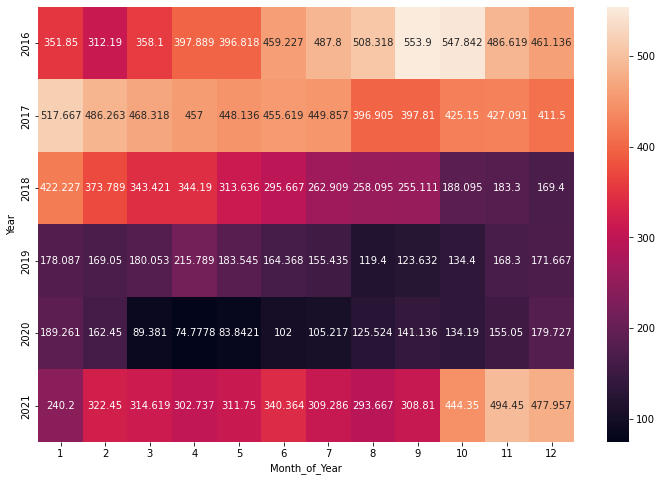

In [37]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df, values="Close",index="Year",columns="Month_of_Year",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month, annot=True,fmt="g")
plt.show()

### Boxplot for all the month throughout all the years

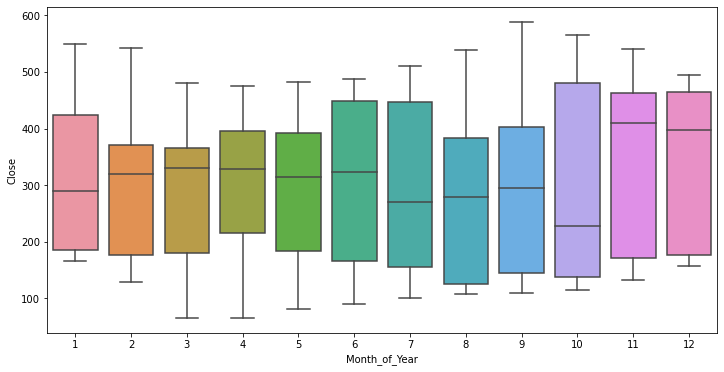

In [38]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Month_of_Year', y='Close',data=df)
plt.show()

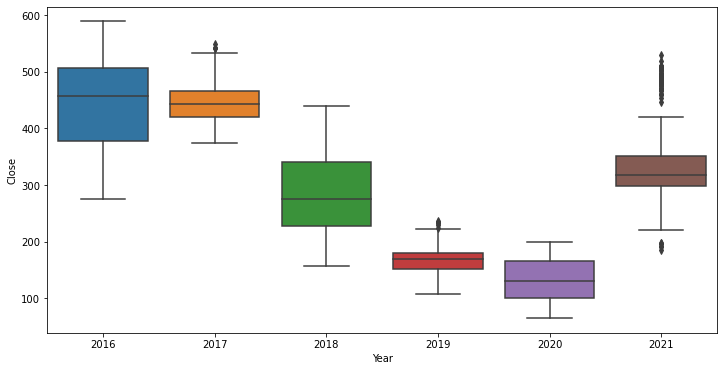

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Year', y='Close', data=df)
plt.show()

## Time series decomposition plot
- To find the clear trend
- To find the seasonality(Additive/Multiplicative)

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

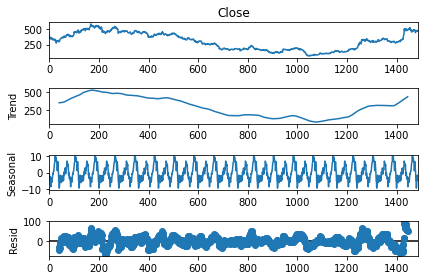

In [41]:
decompose_ts_add = seasonal_decompose(df['Close'], period=80 )
decompose_ts_add.plot()
plt.show()

In [42]:
df["Date"]= pd.to_datetime(df["Date"])
indexdata=df.set_index(["Date"])

In [43]:
indexdata

,Close,Year,Month_of_Year
Date,,,
2016-01-01,402.0,2016,1
2016-01-04,377.0,2016,1
2016-01-05,374.0,2016,1
2016-01-06,366.0,2016,1
2016-01-07,344.0,2016,1
...,...,...,...
2021-12-27,471.0,2021,12
2021-12-28,480.0,2021,12
2021-12-29,476.0,2021,12


In [44]:
from datetime import datetime

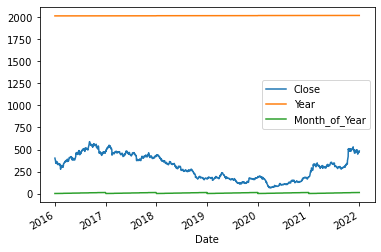

In [45]:
indexdata.plot()
plt.show()

In [46]:
resample = indexdata.resample('M') #M for monthly basis
quarterly_mean_sales = resample.mean()
quarterly_mean_sales

,Close,Year,Month_of_Year
Date,,,
2016-01-31,351.850000,2016.0,1.0
2016-02-29,312.190476,2016.0,2.0
2016-03-31,358.100000,2016.0,3.0
2016-04-30,397.888889,2016.0,4.0
2016-05-31,396.818182,2016.0,5.0
...,...,...,...
2021-08-31,293.666667,2021.0,8.0
2021-09-30,308.809524,2021.0,9.0
2021-10-31,444.350000,2021.0,10.0


In [47]:
quarterly_mean_sales.head(20)

,Close,Year,Month_of_Year
Date,,,
2016-01-31,351.850000,2016.0,1.0
2016-02-29,312.190476,2016.0,2.0
2016-03-31,358.100000,2016.0,3.0
2016-04-30,397.888889,2016.0,4.0
2016-05-31,396.818182,2016.0,5.0
2016-06-30,459.227273,2016.0,6.0
2016-07-31,487.800000,2016.0,7.0
2016-08-31,508.318182,2016.0,8.0
2016-09-30,553.900000,2016.0,9.0


In [48]:
from pandas import Grouper
from pandas import DataFrame

In [49]:
from pandas.plotting import lag_plot

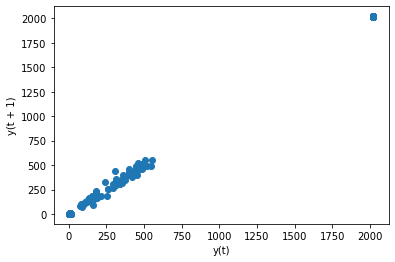

In [50]:
lag_plot(quarterly_mean_sales)
plt.show()

# Checking for stationality

### Dickey fuller test

In [51]:
from statsmodels.tsa.stattools import adfuller

In [52]:
test_result=adfuller(quarterly_mean_sales['Close'])

In [53]:
def adfuller_test(Close):
    result=adfuller(Close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [54]:
adfuller_test(quarterly_mean_sales['Close'])

ADF Test Statistic : -1.0916407384699587
p-value : 0.7183939433218148
#Lags Used : 1
Number of Observations Used : 70
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing

In [55]:
quarterly_mean_sales['Close'] = quarterly_mean_sales['Close'] - quarterly_mean_sales['Close'].shift(1)

In [56]:
quarterly_mean_sales['Close'].shift(1)

Date
2016-01-31           NaN
2016-02-29           NaN
2016-03-31    -39.659524
2016-04-30     45.909524
2016-05-31     39.788889
                 ...    
2021-08-31    -31.077922
2021-09-30    -15.619048
2021-10-31     15.142857
2021-11-30    135.540476
2021-12-31     50.100000
Freq: M, Name: Close, Length: 72, dtype: float64

In [57]:
quarterly_mean_sales['Close']=quarterly_mean_sales['Close']-quarterly_mean_sales['Close'].shift(12)


In [58]:
quarterly_mean_sales.head(20)

,Close,Year,Month_of_Year
Date,,,
2016-01-31,NaN,2016.0,1.0
2016-02-29,NaN,2016.0,2.0
2016-03-31,NaN,2016.0,3.0
2016-04-30,NaN,2016.0,4.0
2016-05-31,NaN,2016.0,5.0
2016-06-30,NaN,2016.0,6.0
2016-07-31,NaN,2016.0,7.0
2016-08-31,NaN,2016.0,8.0
2016-09-30,NaN,2016.0,9.0


In [59]:
quarterly_mean_sales

,Close,Year,Month_of_Year
Date,,,
2016-01-31,NaN,2016.0,1.0
2016-02-29,NaN,2016.0,2.0
2016-03-31,NaN,2016.0,3.0
2016-04-30,NaN,2016.0,4.0
2016-05-31,NaN,2016.0,5.0
...,...,...,...
2021-08-31,-35.925466,2021.0,8.0
2021-09-30,-0.469697,2021.0,9.0
2021-10-31,142.486364,2021.0,10.0


# Retest again dickey fuller test

In [60]:
adfuller_test(quarterly_mean_sales['Close'].dropna())

ADF Test Statistic : -5.8291645789117865
p-value : 4.0128075026117787e-07
#Lags Used : 1
Number of Observations Used : 57
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


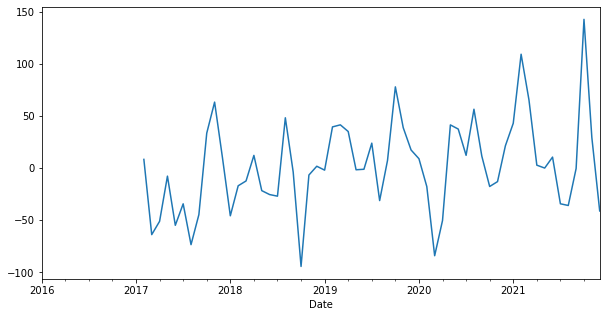

In [61]:
plt.figure(figsize=(10,5))
quarterly_mean_sales['Close'].plot()
plt.show()

In [62]:
from pandas.plotting import lag_plot

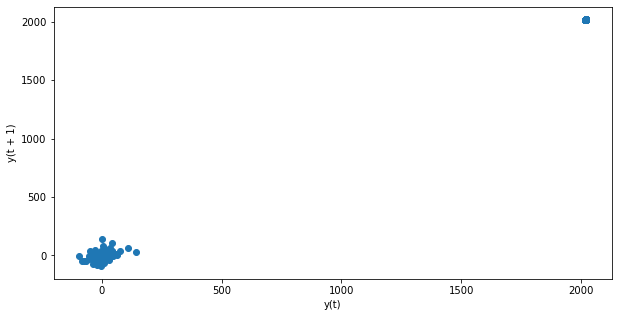

In [63]:
plt.figure(figsize=(10,5))
lag_plot(quarterly_mean_sales)
plt.show()

In [64]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [65]:
import statsmodels.api as sm

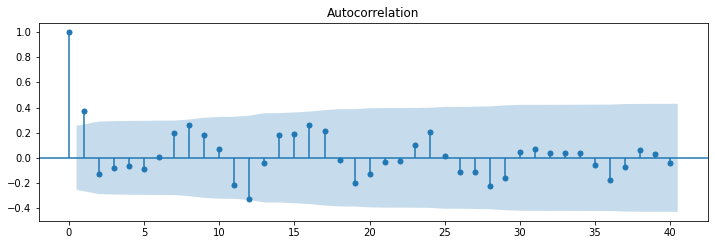

In [66]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(quarterly_mean_sales['Close'].iloc[13:],lags=40,ax=ax1)
#ax2 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(quarterly_mean_sales['price'].iloc[13:],lags=40,ax=ax2)

# 5. Model Building

In [67]:
import numpy as np

In [68]:
quarterly_mean_sales['t']=np.arange(1,73)
quarterly_mean_sales['t_sq']=quarterly_mean_sales['t']*quarterly_mean_sales['t']
quarterly_mean_sales['log_close']=np.log(quarterly_mean_sales['Close'])

In [69]:
quarterly_mean_sales

,Close,Year,Month_of_Year,t,t_sq,log_close
Date,,,,,,
2016-01-31,NaN,2016.0,1.0,1,1,NaN
2016-02-29,NaN,2016.0,2.0,2,4,NaN
2016-03-31,NaN,2016.0,3.0,3,9,NaN
2016-04-30,NaN,2016.0,4.0,4,16,NaN
2016-05-31,NaN,2016.0,5.0,5,25,NaN
...,...,...,...,...,...,...
2021-08-31,-35.925466,2021.0,8.0,68,4624,NaN
2021-09-30,-0.469697,2021.0,9.0,69,4761,NaN
2021-10-31,142.486364,2021.0,10.0,70,4900,4.959246


In [70]:
Train=quarterly_mean_sales[0:50]
Test=quarterly_mean_sales[51:70]

In [71]:
Test.set_index(np.arange(1,20),inplace=True)

# 1. Linear Model

In [72]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Close~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Close'])-np.array(pred_linear))**2))
rmse_linear

50.27984947424663

# 2. Exponential

In [73]:
Exp = smf.ols('log_close~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Close'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

47.252556869404735

# 3.Quadratic 

In [74]:
Quad = smf.ols('Close~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Close'])-np.array(pred_Quad))**2))
rmse_Quad

47.12262341956185

In [75]:
df = quarterly_mean_sales.iloc[:,0:1]
df

,Close
Date,
2016-01-31,NaN
2016-02-29,NaN
2016-03-31,NaN
2016-04-30,NaN
2016-05-31,NaN
...,...
2021-08-31,-35.925466
2021-09-30,-0.469697
2021-10-31,142.486364


# 4.  Additive seasonality 

In [76]:
add_sea = smf.ols('Close~Month_of_Year',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Month_of_Year']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Close'])-np.array(pred_add_sea))**2))
rmse_add_sea

54.61173338975303

# 5. Additive Seasonality With Quadratic Trend

In [77]:
add_sea_Quad = smf.ols('Close~t+t_sq+Month_of_Year',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Month_of_Year','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Close'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

48.07965689658579

# 6.  Multiplicative Seasonality

In [78]:
Mul_sea = smf.ols('log_close~Month_of_Year',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Close'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

47.180761092448044

# 7. Multiplicative With Additive Seasonality 

In [79]:
Mul_Add_sea = smf.ols('log_close~t+Month_of_Year',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Close'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

47.15432883006232

In [80]:
import warnings

In [81]:
warnings.filterwarnings("ignore")

In [82]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
#from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
#from statsmodels.tsa.holtwinters import ExponentialSmoothing 

# 8. ARIMA Model

In [83]:
from statsmodels.tsa.arima_model import ARIMA

In [84]:
model=ARIMA(df['Close'].dropna(),order=(1,1,1))
model_fit=model.fit()

In [85]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                   58
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -297.994
Method:                       css-mle   S.D. of innovations             40.008
Date:                Wed, 15 Jun 2022   AIC                            603.987
Time:                        13:48:14   BIC                            612.229
Sample:                    03-31-2017   HQIC                           607.198
                         - 12-31-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8057      0.434      1.856      0.063      -0.045       1.656
ar.L1.D.Close     0.3071      0.131      2.344      0.019       0.050       0.564
ma.L1.D.Close    -1.0000      0.045    -22.014      0.000      -1.089      -0.911
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.2566           +0.0000j            3.2566            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Date'>

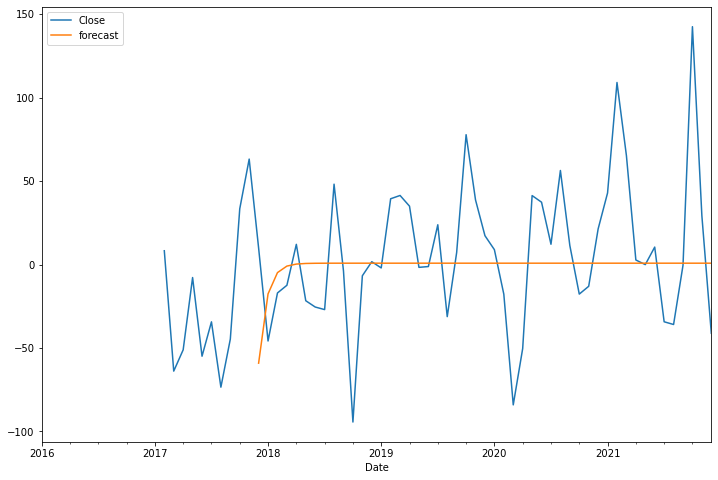

In [86]:
df['forecast']=model_fit.predict(start=10,end=73,dynamic=True)
df[['Close','forecast']].plot(figsize=(12,8))

In [87]:
import statsmodels.api as sm

In [88]:
model=sm.tsa.statespace.SARIMAX(df['Close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

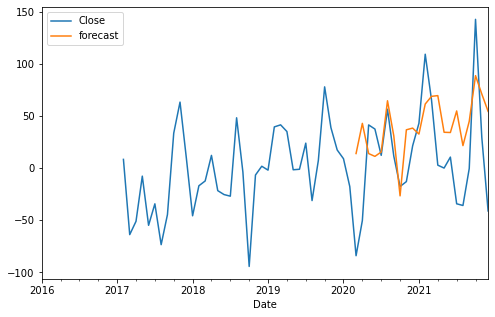

In [89]:
df['forecast']=results.predict(start=50,end=73,dynamic=True)
df[['Close','forecast']].plot(figsize=(8,5))
plt.show()

In [90]:
df.forecast

Date
2016-01-31          NaN
2016-02-29          NaN
2016-03-31          NaN
2016-04-30          NaN
2016-05-31          NaN
                ...    
2021-08-31    21.465342
2021-09-30    44.777571
2021-10-31    88.523957
2021-11-30    70.893220
2021-12-31    54.296309
Freq: M, Name: forecast, Length: 72, dtype: float64

In [91]:
df4 = df.iloc[:,0:1].dropna()
df4

,Close
Date,
2017-02-28,8.256015
2017-03-31,-63.854500
2017-04-30,-51.107071
2017-05-31,-7.792929
2017-06-30,-54.926407
2017-07-31,-34.334632
2017-08-31,-73.470563
2017-09-30,-44.677056
2017-10-31,33.398371


In [92]:
# separating a validation dataset
split_point = len(df4) - 30
dataset, validation = df4[0:split_point], df4[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 29, Validation 30


In [93]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [94]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse_wf = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse_wf)

>Predicted=-12.423, Expected=12.088
>Predicted=12.088, Expected=-21.690
>Predicted=-21.690, Expected=-25.452
>Predicted=-25.452, Expected=-26.996
>Predicted=-26.996, Expected=48.139
>Predicted=48.139, Expected=-3.889
>Predicted=-3.889, Expected=-94.356
>Predicted=-94.356, Expected=-6.736
>Predicted=-6.736, Expected=1.691
>Predicted=1.691, Expected=-2.040
>Predicted=-2.040, Expected=39.401
>Predicted=39.401, Expected=41.371
>Predicted=41.371, Expected=34.967
>Predicted=34.967, Expected=-1.690
>Predicted=-1.690, Expected=-1.207
RMSE: 44.093


In [95]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse_gs = sqrt(mean_squared_error(test, predictions))
    return rmse_gs

In [96]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse_gs = evaluate_arima_model(train, order)
                    if rmse_gs < best_score:
                        best_score, best_cfg = rmse_gs, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse_gs))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [97]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
#evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=38.091
ARIMA(0, 0, 1) RMSE=35.950
ARIMA(0, 0, 2) RMSE=39.228
ARIMA(0, 0, 3) RMSE=40.409
ARIMA(0, 0, 4) RMSE=42.452
ARIMA(0, 1, 0) RMSE=45.277
ARIMA(0, 1, 1) RMSE=36.918
ARIMA(0, 1, 2) RMSE=38.148
ARIMA(0, 1, 3) RMSE=38.913
ARIMA(0, 1, 4) RMSE=43.424
ARIMA(0, 2, 0) RMSE=71.478
ARIMA(0, 2, 1) RMSE=48.722
ARIMA(0, 2, 2) RMSE=55.774
ARIMA(0, 2, 3) RMSE=41.347
ARIMA(0, 2, 4) RMSE=49.406
ARIMA(1, 0, 0) RMSE=36.753
ARIMA(1, 1, 0) RMSE=46.744
ARIMA(1, 2, 0) RMSE=67.264
ARIMA(2, 0, 0) RMSE=37.730
ARIMA(2, 1, 0) RMSE=41.697
ARIMA(2, 2, 0) RMSE=58.934
ARIMA(3, 0, 0) RMSE=38.005
ARIMA(3, 1, 0) RMSE=42.662
ARIMA(3, 2, 0) RMSE=58.434
ARIMA(4, 0, 0) RMSE=39.466
ARIMA(4, 1, 0) RMSE=41.565
ARIMA(4, 2, 0) RMSE=52.983
Best ARIMA(0, 0, 1) RMSE=35.950


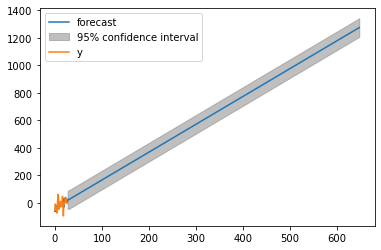

In [98]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

# fit model
model = ARIMA(X, order=(3,1,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=30)[0]
model_fit.plot_predict(1, 648)
plt.show()

In [99]:
forecast

array([18.51288976, 27.51449713, 25.69116362, 23.74153846, 25.6912771 ,
       29.13748359, 31.71888025, 33.43308161, 35.1399657 , 37.16024995,
       39.29977667, 41.36941294, 43.36958424, 45.36939417, 47.394392  ,
       49.42889067, 51.45774153, 53.48102819, 55.50430397, 57.52960404,
       59.55566104, 61.58126169, 63.60641665, 65.63157218, 67.65689041,
       69.68226893, 71.70761058, 73.73291653, 75.75822265, 77.78354183])

In [100]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse_forecast = sqrt(mean_squared_error(val[1], forecast))
rmse_forecast

59.26829870182561

In [101]:
# Save this Model , so we can use for Streamlit
model_fit.save('finalized_model.h5')

#It got save in folder

# 6. Model Evaluation

In [102]:
new = pd.read_csv("TataDateClose.csv")

In [103]:
new

,Date,Close
0,2016-01-01,401.90
1,2016-01-04,377.05
2,2016-01-05,374.45
3,2016-01-06,365.90
4,2016-01-07,343.55
...,...,...
1481,2021-12-27,471.15
1482,2021-12-28,480.20
1483,2021-12-29,476.00
1484,2021-12-30,470.40


In [104]:
new['Date']= pd.to_datetime(new['Date'])
new=new.set_index(['Date'])

In [105]:
new

,Close
Date,
2016-01-01,401.90
2016-01-04,377.05
2016-01-05,374.45
2016-01-06,365.90
2016-01-07,343.55
...,...
2021-12-27,471.15
2021-12-28,480.20
2021-12-29,476.00


In [106]:
# fit model
df1=new.dropna()
#df= newdf.set_index('observation_date').dropna()

# prepare data
X = df1.values
X = X.astype('float32')

In [107]:
model = ARIMA(X, order=(3,1,1))
model_fit = model.fit()

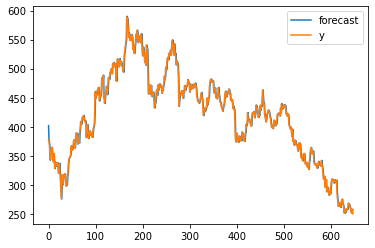

In [108]:
forecast=model_fit.forecast(steps=30)[0]
model_fit.plot_predict(1, 648)
plt.show()

In [109]:
forecast

array([482.72144423, 482.69939871, 482.82952043, 482.95863961,
       483.07923671, 483.19389856, 483.30322345, 483.40761561,
       483.50747033, 483.6031533 , 483.69500044, 483.7833206 ,
       483.86839775, 483.95049302, 484.0298465 , 484.10667895,
       484.18119335, 484.25357634, 484.32399955, 484.39262076,
       484.45958508, 484.5250259 , 484.58906589, 484.65181785,
       484.71338548, 484.77386415, 484.83334152, 484.89189823,
       484.9496084 , 485.0065402 ])

In [110]:
pd.DataFrame(forecast)

,0
0,482.721444
1,482.699399
2,482.829520
3,482.958640
4,483.079237
5,483.193899
6,483.303223
7,483.407616
8,483.507470
9,483.603153


In [111]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1485
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -5238.400
Method:                       css-mle   S.D. of innovations              8.237
Date:                Wed, 15 Jun 2022   AIC                          10488.801
Time:                        13:48:45   BIC                          10520.620
Sample:                             1   HQIC                         10500.661
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0480      0.256      0.188      0.851      -0.454       0.550
ar.L1.D.y      0.9272      0.085     10.870      0.000       0.760       1.094
ar.L2.D.y     -0.0210      0.036     -0.592      0.554      -0.091       0.049
ar.L3.D.y      0.0128      0.027      0.478      0.632      -0.040       0.065
ma.L1.D.y     -0.9029      0.081    -11.101      0.000      -1.062      -0.743
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0876           -0.0000j            1.0876           -0.0000
AR.2            0.2787           -8.4756j            8.4802           -0.2448
AR.3            0.2787           +8.4756j            8.4802            0.2448
MA.1            1.1076           +0.0000j            1.1076            0.0000
-----------------------------------------------------------------------------
"""

In [112]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_wf","rmse_forecast","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea "]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_wf,rmse_forecast,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea ])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,rmse_wf,44.093181
2,rmse_Quad,47.122623
8,rmse_Mult_add_sea,47.154329
7,rmse_Mult_sea,47.180761
1,rmse_Exp,47.252557
6,rmse_add_sea_quad,48.079657
0,rmse_linear,50.279849
5,rmse_add_sea,54.611733
4,rmse_forecast,59.268299


# Algorithm Vs RMSE

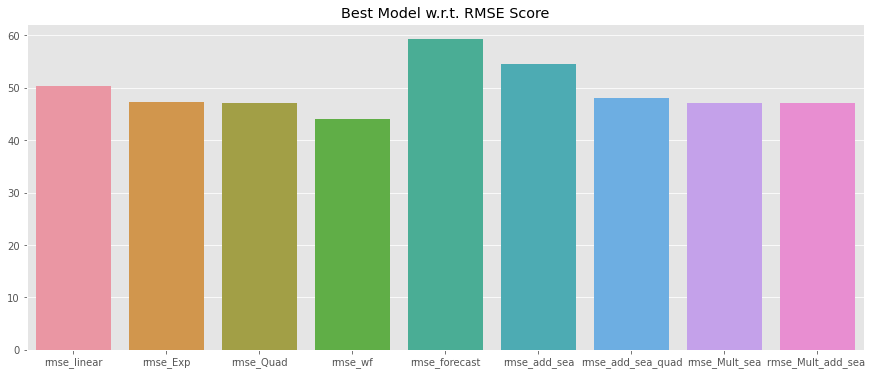

In [113]:
plt.style.use('ggplot') 
plt.figure(figsize=(15,6))
sns.barplot(x='MODEL',y='RMSE_Values',data=data)
plt.title("Best Model w.r.t. RMSE Score") 
plt.show()

# Conclusion: From all the above models ARIMA is the best model as low RMSE value

# 7. Model Deployment

In [114]:
from pickle import dump

In [115]:
# dump(rmse_wf,open('rmse_wf.pkl', 'wb'))

In [116]:
from pickle import load

In [117]:
# rmse_wf_pickle = load(open('rmse_wf.pkl', 'rb'))

# THE END